# Midterm Exam

## Grading Rubric

Each question is worth 20 points. The answer to each question will be graded in terms of:


* Correct Analysis & Computation `(8 points)`
  - Correct use of pandas operations (groupby, aggregation, filtering).
  - Accurate statistics or summaries.

* Appropriate Use of Visuals / Tables — `(6 points)`
  - Visualization or table is relevant to the question.
  - Plot type is appropriate (bar, boxplot, line, etc.).
  - Labels and axes are clear.


* Interpretation and Reasoning — `(6 points)`
  - Conclusions are clearly stated.
  - Interpretations are supported by data.
  - Reasoning is logical and coherent.

## Variable Definitions

* **hotel**
  - H1 = Resort Hotel
  - H2 = City Hotel

* **is_canceled** - Value indicating if the booking was canceled.
  - (1) canceled
  - (0) not canceled

* **lead_time** - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* **arrival_date_year** - Year of arrival date

* **arrival_date_month** - Month of arrival date

* **arrival_date_week_number** - Week number of year for arrival date

* **arrival_date_day_of_month** - Day of arrival date

* **stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

* **stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

* **adults** - Number of adults

* **children** - Number of children

* **babies** - Number of babies

* **meal** - Type of meal booked. Categories are presented in standard hospitality meal packages:
  - Undefined/SC – no meal package.
  - BB – Bed & Breakfast.
  - HB – Half board (breakfast and one other meal – usually dinner).
  - FB – Full board (breakfast, lunch and dinner)

* **country** - Country of origin. Categories are represented in the ISO 3155–3:2013 format

* **market_segment** - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **distribution_channel** - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **is_repeated_guest** - Value indicating if the booking name was from a repeated guest.
  - 1 is a repeated guest.
  - 0 is not a repeated guest.

* **previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking

* **previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking

* **reserved_room_type** - Code of room type reserved. Code is presented instead of designation for anonymity reasons.

* **assigned_room_type** - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

* **booking_changes** - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

* **deposit_type** - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

  - No Deposit – no deposit was made.
  - Non Refund – a deposit was made in the value of the total stay cost.  
  - Refundable – a deposit was made with a value under the total cost of stay.

* **agent** - ID of the travel agency that made the booking

* **company** - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

* **days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer

* **customer_type** - Type of booking, assuming one of four categories:   

  - Contract - when the booking has an allotment or other type of contract associated to it.
  - Group – when the booking is associated to a group.
  - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking.
  - Transient-party – when the booking is transient, but is associated to at least other transient booking

* **adr** - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

* **required_car_parking_spaces** - Number of car parking spaces required by the customer

* **total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor)

* **reservation_status** - Reservation last status, assuming one of three categories:
  - Canceled – booking was canceled by the customer.
  - Check-Out – customer has checked in but already departed.
  - No-Show – customer did not check-in and did inform the hotel of the reason why

* **reservation_status_date** - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\NU-CCIT\.cache\kagglehub\datasets\jessemostipak\hotel-booking-demand\versions\1


In [7]:
import os
import pandas as pd

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


In [8]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:

import matplotlib.pyplot as plt
import seaborn as sns


## 1. Dataset Overview & Core Distributions `(20 points)`

**Question:** What do the shapes and spread of the `lead_time` and `adr` distributions suggest about typical booking behavior and extreme cases in this dataset?

Perform an exploratory analysis of the distributional characteristics of key numerical variables in the hotel booking dataset.

You must:
- Analyze the distribution of lead_time and adr
- Use appropriate summary statistics and visualizations to support your analysis
- Identify any skewness and/or outliers in these variables

Summary Statistics:


,lead_time,adr
count,119390.000000,119390.000000
mean,104.011416,101.831122
std,106.863097,50.535790
min,0.000000,-6.380000
25%,18.000000,69.290000
50%,69.000000,94.575000
75%,160.000000,126.000000
max,737.000000,5400.000000



Skewness:
 lead_time     1.346550
adr          10.530214
dtype: float64


Text(0.5, 1.0, 'ADR Outliers (Spread)')

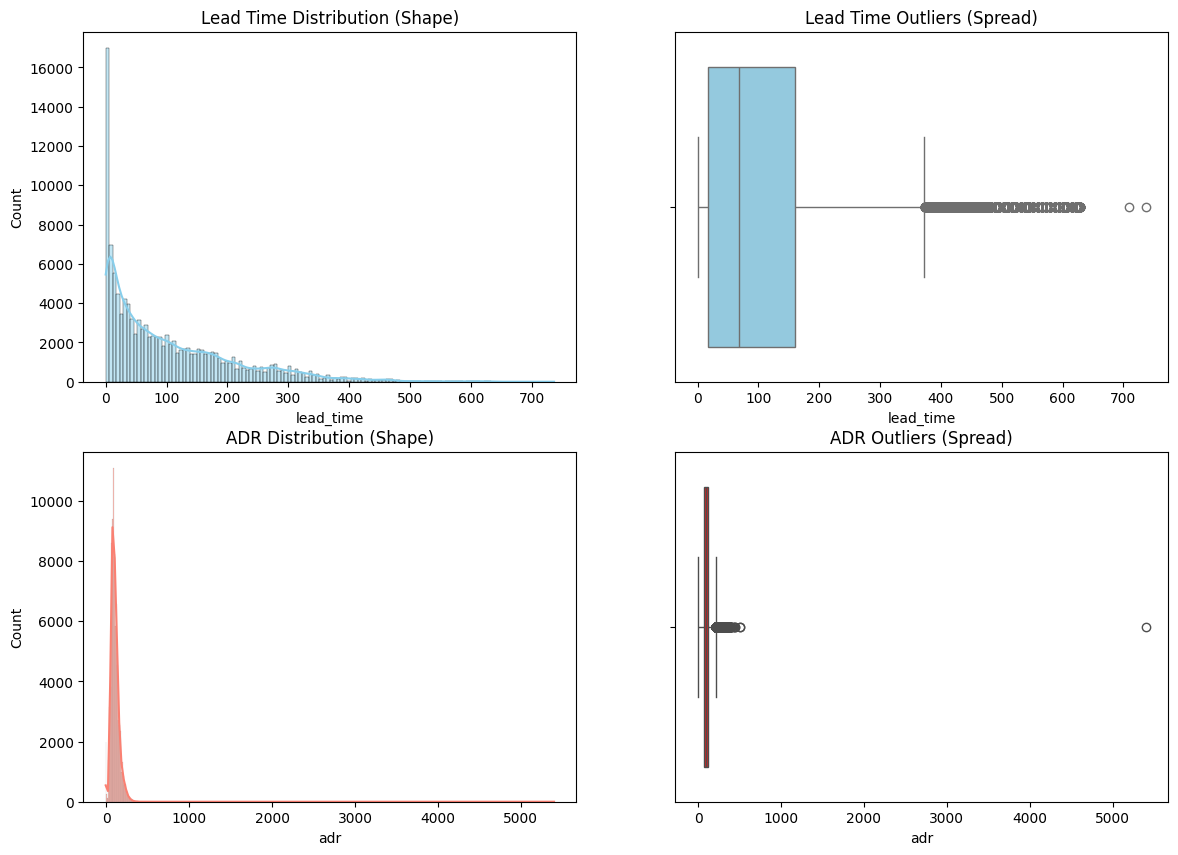

In [10]:
# put your answer here

# Raw stats
stats = df[['lead_time', 'adr']].describe()
skewness = df[['lead_time', 'adr']].skew()

print("Summary Statistics:")
display(stats)
print("\nSkewness:\n",skewness)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram of Lead Time Distribution
sns.histplot(df['lead_time'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Lead Time Distribution (Shape)')

# Boxplot of Lead Time Outliers
sns.boxplot(x=df['lead_time'], ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Lead Time Outliers (Spread)')

# Histogram of ADR Distribution
sns.histplot(df['adr'], kde=True, ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('ADR Distribution (Shape)')

# Boxplot of ADR Outliers
sns.boxplot(x=df['adr'], ax=axes[1, 1], color='red')
axes[1, 1].set_title('ADR Outliers (Spread)')

**Question:** What do the shapes and spread of the `lead_time` and `adr` distributions suggest about typical booking behavior and extreme cases in this dataset?

**> In the case of this dataset, the data shows that there is a signifcant chunk of people who booked the rooms and checked in in less that 10 days. It also shows that there are a lot of people transacting everyday, meaning that in each hotel, no customer stays for too long. In terms of the skewness of the data, it is within the expectange range as hotel and resort businesses typically do not accomodate for long period of stays and focus mostly on days to weeks length.**

## 2. Booking Cancellations and Lead Time `(20 points)`

**Question**: Do bookings with longer lead times tend to cancel more often?

Analyze how `lead_time` differs between canceled and non-canceled bookings.

You must:
- Compute appropriate summary statistics
- Use at least one visualization
- Clearly describe the pattern you observe



Lead Time Stats by Cancellation Status: is_canceled
0    75166
1    44224
Name: lead_time, dtype: int64 
0 = NO 
1 = YES


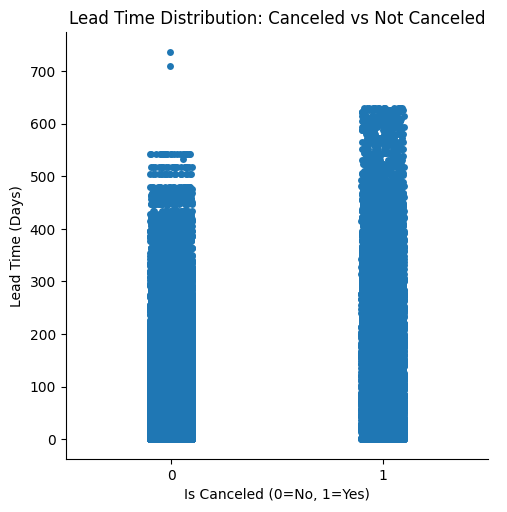

In [12]:
# put your answer here

# Raw stats
cancellation_stats = df.groupby('is_canceled')['lead_time'].count()
print("Lead Time Stats by Cancellation Status:", cancellation_stats, "\n0 = NO \n1 = YES")

# Visualization
sns.catplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time Distribution: Canceled vs Not Canceled')
plt.xlabel('Is Canceled (0=No, 1=Yes)')
plt.ylabel('Lead Time (Days)')
plt.show()



**Question**: Do bookings with longer lead times tend to cancel more often?

Analyze how `lead_time` differs between canceled and non-canceled bookings.


**> The data states that booking with longer lead times have more cancelations vs those who coninued with their bookings. The maximum days is over 600 days or roughly 2 years of booking in advance. While reasoning for cancellation cannot be determined via these 2 columns, it is safe to assume that there are people who book and lose interest over time because of how long they have to wait.**

## 3. Seasonality and Pricing `(20 points)`

**Question**: Do `Resort Hotels` and `City Hotels` exhibit different seasonal pricing behaviors throughout the year? If so, during which months are these differences most pronounced?

Analyze how Average Daily Rate (ADR) varies across arrival months, and compare this pattern between Resort Hotels and City Hotels.

You must:
- Aggregate ADR by month and hotel type
- Use a visualization to support your analysis
- Identify at least one seasonal pricing pattern

In [47]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [81]:
# put your answer here
per_hotel = df.groupby(['hotel', 'arrival_date_month'])['adr'].count().sort_values()

display(per_hotel)

hotel         arrival_date_month
Resort Hotel  January               2193
              November              2437
              December              2648
              June                  3045
              February              3103
              September             3108
              March                 3336
              October               3555
              May                   3559
              April                 3609
City Hotel    January               3736
              December              4132
              November              4357
Resort Hotel  July                  4573
              August                4894
City Hotel    February              4965
              March                 6458
              September             7400
              April                 7480
              October               7605
              June                  7894
              July                  8088
              May                   8232
              August    

**Question**: Do `Resort Hotels` and `City Hotels` exhibit different seasonal pricing behaviors throughout the year? If so, during which months are these differences most pronounced?

Analyze how Average Daily Rate (ADR) varies across arrival months, and compare this pattern between Resort Hotels and City Hotels.


**>The data dictates that the highest number of ADR for both hotels is August, while the weakest is both January. This could most likely be because of winter season as most people would rather stay at home or visit a warmer place for to spend their winter times. On the contrary, August is right around the end of summer for places with 4 seasons, which can be the perfect time to get out have some sun and enjoy the outside views.**

## 4. Customer Behavior `(20 points)`

**Question:** Do repeated guests behave differently from first-time guests?

Compare repeated guests and non-repeated guests in terms of:
- Cancellation rate
- Booking behavior (e.g., booking changes or lead time)
- Use summary statistics and/or visualizations to support your answer.


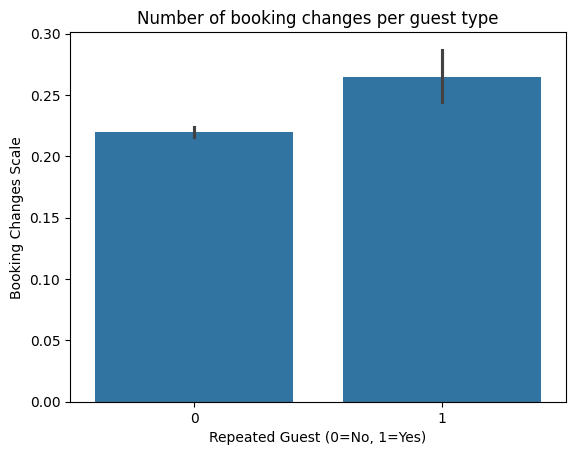

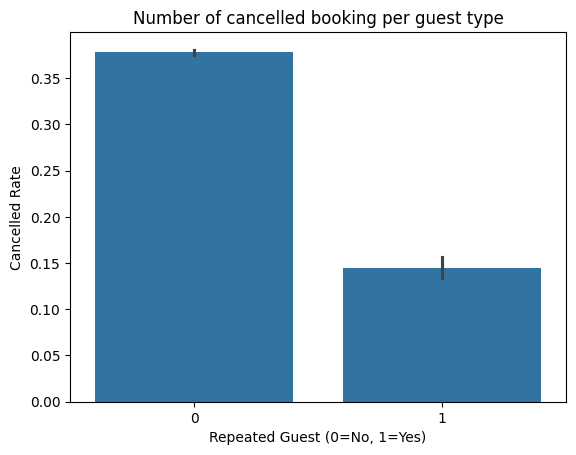

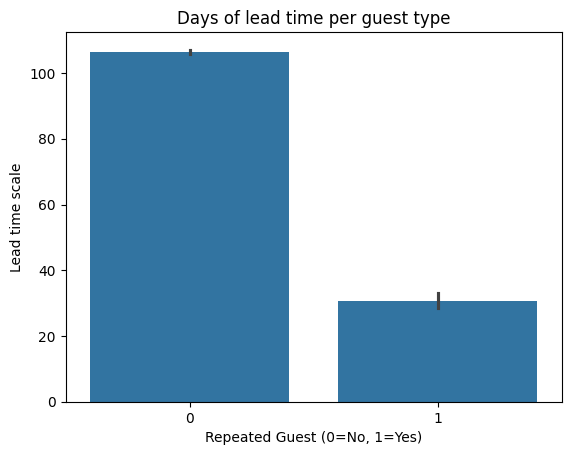

In [100]:
# put your answer here
sns.barplot(x='is_repeated_guest', y='booking_changes', data=df)
plt.title('Number of booking changes per guest type')
plt.xlabel('Repeated Guest (0=No, 1=Yes)')
plt.ylabel('Booking Changes Scale')
plt.show()

sns.barplot(x='is_repeated_guest', y='is_canceled', data=df)
plt.title('Number of cancelled booking per guest type')
plt.xlabel('Repeated Guest (0=No, 1=Yes)')
plt.ylabel('Cancelled Rate')
plt.show()

sns.barplot(x='is_repeated_guest', y='lead_time', data=df)
plt.title('Days of lead time per guest type')
plt.xlabel('Repeated Guest (0=No, 1=Yes)')
plt.ylabel('Lead time scale')
plt.show()


**Question:** Do repeated guests behave differently from first-time guests?

**>Based on the data, repeated guest typically have more booking changes. Based on that we can derive that guests either book for bigger rooms or size down after some time. The repeated guest also cancelled less times than first timers, indicating trust and possibly only cancelling when there really is no other choice for the guest. Lastly, repeated guests have the less time leads which can mean that they already know when to book for the hotel as they have experienced it before and therefore being sure of the timeline of when it is the best time to book their rooms.**

## 5. Booking Cancellation Insights `(20 points)`

**Question:** Which combination of variables appears to have the strongest relationship with booking cancellations, and how do these variables interact to influence the likelihood of a cancellation?


Using at least three variables from the dataset, identify one strong pattern related to booking cancellations.

Your answer must:
- Clearly state the pattern
- Explain how the variables interact
- Support the conclusion with data


In [ ]:
# put your answer here